<a href="https://colab.research.google.com/github/RituAnilkumar/nnrms/blob/main/raster_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <h1 align="center"> Raster Data Visualization and Operations using Python</h1>


## Introduction
<p align="justify">Satellites are often referred to as 'the eye in the sky with a brain on the ground.' This is because they provide a birds-eye view over large regions which can be used to prepare maps that can be used over numerous applications ranging from providing information of natural resources, forest, water bodies, crop health to providing inputs of site suitability for public amenities, city expansion, crop expansion to disaster risk reduction through early warning systems for floods, cyclones, thunderstorms, earthquakes, tsunamis, landslides and more. With the launch of newer and better satellites and technologies such as aerial surveys and drone based photogrammetry, remote sensing images present vital inputs to governance and planning activity. </p>

<p align="justify"> Geospatial data cannot be visualized using everyday photo viewers as the data contains several attributes such as headers with coordinate information, projection, pixel size information, sun and azimuth information, sensor platform, height, time and date of acquisition etc. Moreover, satellte imagery are ot limited to the RGB color composites that most photoviewers use. Remote sensing software such as ENVI, ArDAS, ArcGIS, QGIS, SAGA, GRASS etc allow us to read and manipulate this information for visualizing and analysis on the bands of our interests. Further, these software offer a set of ready made tools that will allow you to perform analysis on this imagery. But what if you want to apply techniques that are not readily available? What if you want to apply your own techniques onto the data for improved results? In such cases using a programming language provides the flexibility needed to configure your own code for the desired application. We will use Python in this tutorial </p>

<p align="justify"> Geospatial data is of two types, raster data and vector data. Simply put the difference between the two is that raster data is image data composed of pixels and band. Vector data can be points, lines and polygons and can also contain attribute information. </p>

## Visualization of Single band raster imagery using Python
<p align="justify"> In this tutorial, we will learn how to get started with geospatial data. We will first start importing Rasterio and other libraries of our interest, reading the images and exploring their properties, bands and visualizing them. So let's dive right in! </p>

In [1]:
# The below command is to access the data for the tutorial. You may follow the link to explore.
!git clone https://github.com/RituAnilkumar/nnrms.git

Cloning into 'nnrms'...
remote: Enumerating objects: 69, done.
remote: Counting objects: 100% (69/69), done.
remote: Compressing objects: 100% (62/62), done.
remote: Total 69 (delta 24), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (69/69), 20.51 MiB | 19.37 MiB/s, done.
Resolving deltas: 100% (24/24), done.


The data is copied into the NNRMS folder. Click on the folder icon on the left and refresh to view it and its contents

In [2]:
!unzip /content/nnrms/day2/raster.zip

Archive:  /content/nnrms/day2/raster.zip
   creating: raster/
  inflating: raster/band_1.tif       
  inflating: raster/band_2.tif       
  inflating: raster/band_3.tif       
  inflating: raster/band_4.tif       
  inflating: raster/band_5.tif       
  inflating: raster/band_6.tif       
  inflating: raster/band_7.tif       
  inflating: raster/band_11.tif      
  inflating: raster/band_12.tif      
  inflating: raster/band_8.tif       
  inflating: raster/srtm.tif         


A new directory called raster is created with the data we will use for the exercise. The next step is to import the library to read raster datasets. There's alibrary called Rasterio (https://rasterio.readthedocs.io/en/stable/intro.html) which can be used to open and work with raster data.

In [3]:
!pip install rasterio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 25.8 MB/s eta 0:00:00


In [4]:
# Import the library rasterio
import rasterio as rst

In [5]:
# Read in our image using GDAL
dataset = rst.open('/content/raster/srtm.tif')
print(dataset)

<open DatasetReader name='/content/raster/srtm.tif' mode='r'>


<p align="justify"> Next, we try to get more information about the image, such as the number of bands, rows and columns. For this we use the rasterio functions count, height and widthrespectively.

In [6]:
# Number of bands
dataset.count

1

In [7]:
# Number of rows
dataset.height

154

In [8]:
# Number of columns
dataset.width

179

The opened file is of type rasterio DatasetReader. You can check this by printing dataset or by using the type function

In [9]:
type(dataset)

rasterio.io.DatasetReader

We can check the coordinate reference system of the dataset using the crs command

In [10]:
dataset.crs

CRS.from_epsg(4326)

We can also view the metadata of the dataset by using the meta function. This displays a dictionary of information about the data.

In [11]:
dataset.meta

{'driver': 'GTiff',
 'dtype': 'int16',
 'nodata': -32767.0,
 'width': 179,
 'height': 154,
 'count': 1,
 'crs': CRS.from_epsg(4326),
 'transform': Affine(0.0008333333333333693, 0.0, 88.51625,
        0.0, -0.0008333333333333137, 27.16208333333333)}

In order to read the image as a numpy array, use rasterio's read function

In [12]:
dataset_np=dataset.read()

Check the size of the numpy array as follows

In [13]:
# Another way to check the bands, rows and columns
dataset_np.shape

(1, 154, 179)

In order to visualize the data, use the matplotlib library's imshow function. The imshow function has a cmpa option for plotting the image in different colours

In [14]:
# Import matplotlib library with the alias plt
import matplotlib.pyplot as plt

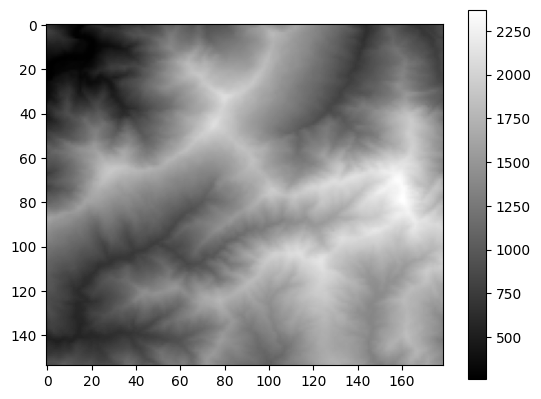

In [15]:
plt.imshow(dataset_np[0,:,:], cmap='gray')
plt.colorbar()

You can choose from a wide range of colormaps. See https://matplotlib.org/stable/users/explain/colors/colormaps.html for more information

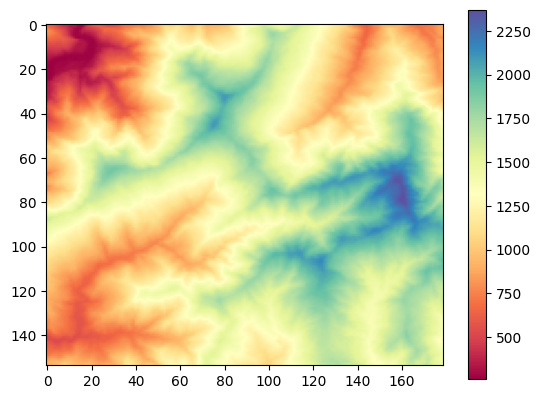

In [16]:
plt.imshow(dataset_np[0,:,:], cmap='Spectral')
plt.colorbar()

## Visualization of multispectral raster imagery using Python

In order to work with multispectral data where each band is represented in a separate file, we need to create a list of the files. We can do that using a simple Python list with each path specified such as /content/raster/band_1.tif, /content/raster/band_2.tif and so on. But this is not feasible for a larger number of bands. We can use the Python helper library called glob to do this

In [17]:
# Create a file list using glob
import glob
band_list=sorted(glob.glob('/content/raster/band_*.tif'))
band_list

['/content/raster/band_1.tif',
 '/content/raster/band_11.tif',
 '/content/raster/band_12.tif',
 '/content/raster/band_2.tif',
 '/content/raster/band_3.tif',
 '/content/raster/band_4.tif',
 '/content/raster/band_5.tif',
 '/content/raster/band_6.tif',
 '/content/raster/band_7.tif',
 '/content/raster/band_8.tif']

In order to merge these 10 separate images into a single image with 10 bands we will first create a new file with the same metadata, but increased number of bands.

In [18]:
# Read metadata of first file
with rst.open(band_list[0]) as src0:
    meta = src0.meta

# Update meta to reflect the number of layers
meta.update(count = len(band_list))

Now we open the raster files one by one and write it into a file we will call stacked.tif

In [19]:
# Read each layer and write it to stack
with rst.open('stack.tif', 'w', **meta) as stacked:
    for id, layer in enumerate(band_list, start=1):
        with rst.open(layer) as src1:
            stacked.write_band(id, src1.read(1))

Note here we used the enumerate function. This is what the enumerate function does.

In [20]:
for x,y in enumerate(band_list,start=1):
    print(x)
    print(y)

1
/content/raster/band_1.tif
2
/content/raster/band_11.tif
3
/content/raster/band_12.tif
4
/content/raster/band_2.tif
5
/content/raster/band_3.tif
6
/content/raster/band_4.tif
7
/content/raster/band_5.tif
8
/content/raster/band_6.tif
9
/content/raster/band_7.tif
10
/content/raster/band_8.tif


See the metadata of the stacked file contains all 10 bands

In [21]:
stacked.meta

{'driver': 'GTiff',
 'dtype': 'uint16',
 'nodata': None,
 'width': 772,
 'height': 742,
 'count': 10,
 'crs': CRS.from_epsg(32646),
 'transform': Affine(20.0, 0.0, 54960.0,
        0.0, -20.0, 3012340.0)}

In [22]:
# close the file
stacked.close

<bound method DatasetBase.close of <closed DatasetWriter name='stack.tif' mode='w'>>

In [23]:
stacked=rst.open('/content/stack.tif')

To visualize the image as a color composite we can use the rasterio read function to first convert into a numpy array and then display as a color composite using imshow. However, three bands should be passed instead of a single band. The first band represents red, the second green and the third blue.

In [24]:
# Read the bands using the read function
stacked_np=stacked.read()
stacked_np.shape

(10, 742, 772)

In [25]:
# We can also read the individual bands
nir_np=stacked.read(10)
red_np=stacked.read(6)
green_np=stacked.read(5)
blue_np=stacked.read(4)

In [26]:
import numpy as np

In [27]:
tcc_stack=np.dstack((red_np,green_np,blue_np))

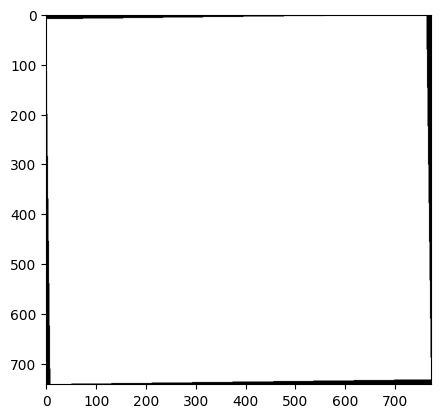

In [28]:
plt.imshow(tcc_stack)

What happened here? This appears all white because imshow uses a range of colors from 0 to 1 when used with multiple bands. So we have to normalize our image into the range 0 to 1. This can be done by subtracting the minimum (minimum value in the entire image) from the pixel value and dividing by the range (maximum value-minimum value)

In [29]:
# Normalize bands into 0.0 - 1.0 scale
def normalize(array):
    array_min, array_max = array.min(), array.max()
    return (array - array_min) / (array_max - array_min)

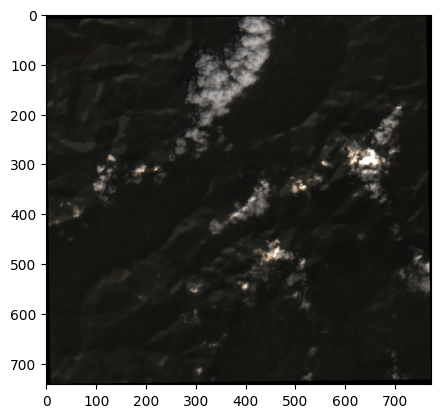

In [30]:
# Normalize band DN
nir_norm = normalize(nir_np)
red_norm = normalize(red_np)
green_norm = normalize(green_np)
blue_norm = normalize(blue_np)

# Stack bands
tcc_stack_norm = np.dstack((red_norm, green_norm, blue_norm))

# View the color composite
plt.imshow(tcc_stack_norm)

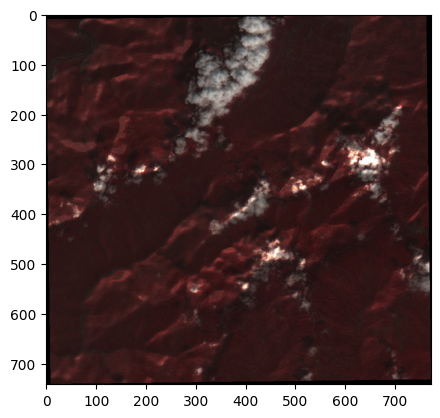

In [31]:
# Stack bands
fcc_stack_norm = np.dstack((nir_norm, red_norm, green_norm))

# View the color composite
plt.imshow(fcc_stack_norm)

## Raster Operations
Raster Operations can be of the following types:





### Local operations
<p align="justify">These operations are performed on every pixel of the raster. They can be arithmetic operations such as +,-,*,/,%. These provide the mathematical output on each pixel. Consider the following examples </p>

**_Example 1:_**
$$ \begin{bmatrix} 1 & 2 & 5 \\ 3 & 1 & 1 \\ 0 & 2 & 4 \end{bmatrix} * 2 = \begin{bmatrix} 2 & 4 & 10 \\ 6 & 2 & 2 \\ 0 & 4 & 8 \end{bmatrix} $$

_**Example 2:**_
$$ \begin{bmatrix} 1 & 2 & 5 \\ 3 & 1 & 1 \\ 0 & 2 & 4 \end{bmatrix} + \begin{bmatrix} 1 & 2 & 5 \\ 3 & 1 & 1 \\ 0 & 2 & 4 \end{bmatrix} = \begin{bmatrix} 2 & 4 & 10 \\ 6 & 2 & 2 \\ 0 & 4 & 8 \end{bmatrix} $$

<p align="justify"> Local operations can also be relational operations which give a boolean valued output (True=1/False=0). See the example below.</p>

_**Example 3:**_
$$ \begin{bmatrix} 1 & -2 & 5 \\ 3 & -1 & 1 \\ 0 & 2 & -4 \end{bmatrix} >2 = \begin{bmatrix} 1 & 0 & 1 \\ 1 & 0 & 1 \\ 0 & 1 & 1 \end{bmatrix} $$

<p align="justify"> Logical expressions are also local expressions and also output boolean values. See below the truth table for And, Or and Not. </p>

**<p align="center"> Truth table for AND operation </p>**

><p align="center">A|<p align="center">B|<p align="center">A AND B
>------|------|------
><p align="center">0|<p align="center">0|<p align="center">0
><p align="center">1|<p align="center">0|<p align="center">0
><p align="center">0|<p align="center">1|<p align="center">0
><p align="center">1|<p align="center">1|<p align="center">1

**<p align="center"> Truth table for OR operation </p>**

><p align="center">A|<p align="center">B|<p align="center">A OR B
>------|------|------
><p align="center">0|<p align="center">0|<p align="center">0
><p align="center">1|<p align="center">0|<p align="center">1
><p align="center">0|<p align="center">1|<p align="center">1
><p align="center">1|<p align="center">1|<p align="center">1

**<p align="center"> Truth table for NOT operation </p>**
><p align="center">A|<p align="center">NOT A
>------|------
><p align="center">0|<p align="center">1
><p align="center">1|<p align="center">0

### Focal Operations
Focal operations substitute the pixel value with a value dependant on it's neighbourhood. A good example for this is filtering. Consider the following example where a 3x3 mean filter is applied on the central pixel.

**_Example 4:_**
$$ Mean_{3x3}(\begin{bmatrix} 1 & 1 & 1 & 0 & 2 \\ 2 & 1 & 2 & 3 & 1 \\ 0 & 0 & 4 & 1 & 1 \\ 0 & 3 & 2 & 2 & 1 \\ 1 & 4 & 3 & 2 & 0 \end{bmatrix}) $$

Here, the central element is 4 and a 3x3 mean filter applied on it results in:
$$ \frac{1+2+3+1+4+1+2+3+0}{9}=\frac{18}{9}=2 $$

Hence, 4 is replaced by the average of it's 3x3 neighbours which is 2.


### Zonal Operations
Zonal operations are similar to focal operations. However, instead of a fixed 3x3 filter neighbourhood, we can define zones over which the operations are performed. For example, we can have a zonal matrix given by Z
$$ Z= \begin{bmatrix} a & a & b \\ a & a & a \\ b & b & c \end{bmatrix} $$
Here, we have 3 zones: a, b and c. If we were to calculate the zonal maximum for the matrix A
$$ A= \begin{bmatrix} 1 & 5 & 3 \\ 6 & 3 & 2 \\ 9 & 1 & 7 \end{bmatrix};  Z_{max}(A)= \begin{bmatrix} 6 & 6 & 9 \\ 6 & 6 & 6 \\ 9 & 9 & 7 \end{bmatrix} $$

### Global Operations
Global operations as the name suggests involves operations relying on the entire image. A good example for this is the Euclidean distance calculation. Consider the matrix A with the source cells given below. The euclidean distance matrix E is given by the distance of the cell to the nearest source cell. For he source cells, as the distance to itself is 0, the value will be 0. For top, bottom, left or right neighbours, the distance is 1. For diagonal, the distance is $\sqrt2$.

$$ A=\begin{bmatrix} - & - & 1 \\ 2 & - & 1 \\ - & - & - \end{bmatrix} $$
$$ E=\begin{bmatrix} 1 & 1 & 0 \\ 0 & 1 & 0 \\ 1 & \sqrt2 & 1 \end{bmatrix} $$

In this exercise, we will apply some local operations (arithmetic, relational and logical operations)

In [32]:
ndvi=(nir_np-red_np)/(nir_np+red_np)
is_nan=np.isnan(ndvi)
ndvi[is_nan]=0
print(ndvi.shape)

(742, 772)


<ipython-input-32-8b3ad27cf52a>:1: RuntimeWarning: invalid value encountered in divide
  ndvi=(nir_np-red_np)/(nir_np+red_np)


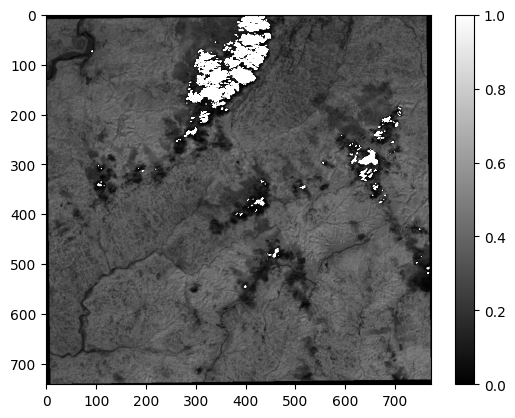

In [33]:
plt.imshow(ndvi[:,:],cmap='gray',vmin=0,vmax=1)
plt.colorbar()

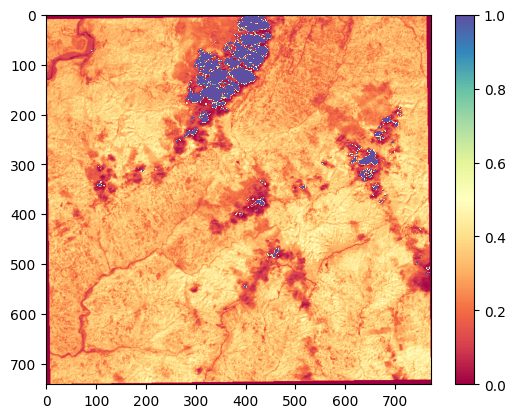

In [34]:
plt.imshow(ndvi[:,:],cmap='Spectral',vmin=0,vmax=1)
plt.colorbar()

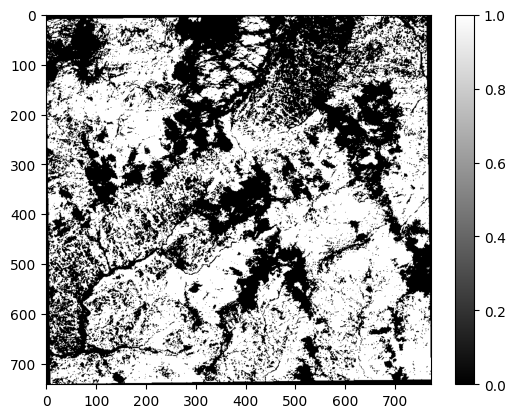

In [35]:
thresh=ndvi>0.3
plt.imshow(thresh[:,:],cmap='gray',vmin=0,vmax=1)
plt.colorbar()

## References and Material


1.   https://www.softwaretestinghelp.com/python/
2.   https://developers.google.com/edu/python
3.   https://github.com/ceholden/open-geo-tutorial/tree/master/Python/chapters
4.   http://pcjericks.github.io/py-gdalogr-cookbook/
5.   https://www.qgistutorials.com/en/

